In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras.layers import Dense

from keras.utils import plot_model


Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
network = models.Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2534 - accuracy: 0.9266
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1030 - accuracy: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.0681 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0492 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.0376 - accuracy: 0.9886


In [5]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 22us/step
test_acc: 0.9818000197410583


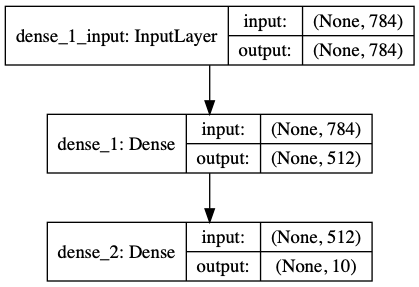

In [7]:
plot_model(network, to_file='model.png', show_shapes=True, show_layer_names=True, expand_nested=True)